#      <center> COVID-19 Data Analysis </center>

### <center> Singhealth Singapore General Hospital Take Home Exercise </center>
### <center> Ng Guangren, Ryan </center>

Please uncomment and run the codes in the next cell if your current environment doesn't have these packages installed

In [1]:
# %conda install pandas
# %conda install numpy
# %conda install matplotlib
# %conda install seaborn
# %pip install sklearn
# %conda install "basemap==1.2.2" "basemap-data-hires==1.2.2"
# %pip install sqlite3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

from sklearn.metrics.pairwise import nan_euclidean_distances
from mpl_toolkits.basemap import Basemap
import sqlite3

import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator

/home/ryan/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Cases and Deaths trends
Exporting solely for these line graphs:

In [3]:
df = pd.read_csv(r"Data.csv")

# Data Exploration and preprocessing


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

In [5]:
df.describe().round(2)


,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38472.00,38472.00,38472.00,38472.00,38472.00,38472.00,3.847200e+04,38472.00,38472.00,30577.00,38218.00,34862.00
mean,23.74,20.21,17.72,3.17,2.09,19002.33,4.896983e+07,32.75,10.66,39440.59,287902.66,8090.50
std,26.06,61.07,8.13,2.56,1.52,22271.11,1.427251e+08,8.47,6.77,150184.66,1405242.87,29548.75
min,-40.90,-106.35,-2.00,0.20,0.02,411.60,3.412840e+05,16.00,1.00,-239172.00,1.00,1.00
25%,8.62,-3.44,11.00,1.40,0.82,3659.00,4.793900e+06,27.00,5.00,1505.00,2074.00,77.00
50%,27.51,21.82,20.00,2.50,1.89,8821.80,1.148464e+07,32.00,8.00,5520.00,21431.00,527.00
75%,45.94,47.48,25.00,4.49,3.21,25946.20,4.286296e+07,41.00,16.00,20382.00,137377.00,3480.50
max,64.96,179.41,29.00,13.05,7.52,114704.60,1.339180e+09,48.00,28.00,2945871.00,28605669.00,513091.00


In [6]:
df = df.round(3)
df


,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,1804.0,35960.0,1456.0
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,2965.0,35994.0,1458.0
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.0
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.0


The feature `Entity`'s name is a little too generalised. It will be changed to `Country` as it is synonomous to sovereign state. 

In [7]:
df.Entity.unique()


array(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Bulgaria', 'Canada',
       'Cape Verde', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Denmark', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Ghana', 'Greece', 'Guatemala', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Latvia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar',
       'Malawi', 'Malaysia', 'Malta', 'Mauritania', 'Mexico', 'Mongolia',
       'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'New Zealand', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Russia',

Turning features with object type  into string helps in narrowing down the scope. For example numbers cannot be placed in a string feature. It also allows data type specific operations.[<sup>1</sup>](https://towardsdatascience.com/why-we-need-to-use-pandas-new-string-dtype-instead-of-object-for-textual-data-6fd419842e24)

In [8]:
object_to_string = {
    'Entity': 'string',
    'Continent': 'string',
}

df = df.astype(object_to_string)
# df["Date"] = pd.to_datetime(df.Date) # I have problems with insertion with this datatype


Renamed serveral features to more appropriate names.

In [9]:
df.rename({"Entity": "Country", "GDP/Capita": "GDP per capita", "Continent":"Region"},
          inplace=True, axis=1)

Extracting countries's Region data from UN Statistical Division dataset.[<sup>2</sup>](https://unstats.un.org/unsd/methodology/m49/overview/) This is used as it has more varied values than the given `Continent` feature. 

The data is partially clean using `libreoffice Calc`, an equivalent to `Microsoft Office Excel` where some countries' name are renamed to what is shown on `df.countries.unique()`. Some columns are removed too in the application because of uneven rows lengths.

The rest of the preprocessing is done using pandas. 

After doing some line plots in the cells below, there are some region there are very little countries so I merged them together, for example Oceania

In [10]:
unsd = pd.read_csv("unsd.csv")
unsd = unsd[["Region Name","Sub-region Name","Intermediate Region Name",'Country or Area']]
unsd.rename({"Country or Area":"Country"},inplace=True,axis=1)
unsd.loc[unsd["Sub-region Name"]=="Sub-Saharan Africa",["Sub-region Name"]] = unsd[unsd["Sub-region Name"]=="Sub-Saharan Africa"]["Intermediate Region Name"]
unsd.loc[unsd["Sub-region Name"]=="Latin America and the Caribbean",["Sub-region Name"]] = unsd[unsd["Sub-region Name"]=="Latin America and the Caribbean"]["Intermediate Region Name"]
unsd.drop(inplace=True,axis=1,labels=["Region Name","Intermediate Region Name"])
unsd.rename({"Sub-region Name":"Region"},inplace=True,axis=1)
unsd.loc[unsd.Region.isin(['Australia and New Zealand','Melanesia','Polynesia']) ,'Region'] = "Oceania"

# for i, row in enumerate(df.values):
#     t = unsd[unsd.Country == row[0]].Region
#     df.iloc[i,1] = t.values[0] // This is too slow dont use this.

unsd.set_index('Country',inplace=True)
df = unsd.merge(df,right_on='Country',left_on='Country')#Much faster
df.drop("Region_y",axis=1,inplace=True)
df.rename({"Region_x":"Region"},inplace=True,axis=1)

### Null checking and imputation

In [11]:
df.isnull().sum()

Country                               0
Region                                0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP per capita                        0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                        7895
Cases                               254
Deaths                             3610
dtype: int64

There are nulls in `Daily tests`, `Cases`, `Deaths`.  
  
KNNImputer will work because each of country groups have at least some values. This is shown by finding any nulls when calculating the mean of each group's features.

In [12]:
df.groupby('Country').mean()[["Daily tests", "Cases", "Deaths"]].isnull().any()


Daily tests    False
Cases          False
Deaths         False
dtype: bool

`sklearn.KNNImputer` is used as it is more rombust than `bfill`,`ffill` and `sklearn.SimpleImputer` of various strategies (mean,median,constant and etc).  
  
`nan_euclidean_distances` function is used to estimate number of neighbours to be used.[<sup>3</sup>](https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/)


In [13]:
d = []

for name, group in df.groupby('Country'):
    l = list(filter(lambda x: x > 0,
                    sorted(
                        nan_euclidean_distances(group[["Daily tests", "Cases", "Deaths"]])[0]  
                        # First row
                    )))
    if len(l) == 0:
        continue
    d.append(int(l[0]))

avg = sum(d)/len(d)
avg


6.875

In [14]:
for name, group in df.groupby('Country'):
    l = list(filter(lambda x: x > 0,
                    sorted(
                        nan_euclidean_distances(
                            group[["Daily tests", "Cases", "Deaths"]]
                        )[0]
                    )))
    num = avg if len(l) == 0 else int(l[0])
    imputer = KNNImputer(n_neighbors=num)
    df.loc[df.Country == name, ["Daily tests", "Cases", "Deaths"]] = \
        imputer.fit_transform(X=group[["Daily tests", "Cases", "Deaths"]])

df.isnull().any()[lambda x: x == True]


Series([], dtype: bool)

# Sqlite3 Setup, creations and insertions

In [15]:
from datetime import datetime

con = sqlite3.connect("db.db")
cur = con.cursor()
cur.execute('''
    DROP TABLE IF EXISTS covid19_country_data;
''')
cur.execute('''
CREATE TABLE IF NOT EXISTS covid19_country_data(
    id INTEGER PRIMARY KEY NOT NULL,
    country TEXT NOT NULL,
    region TEXT NOT NULL,
    latitude REAL NOT NULL,
    longitude REAL NOT NULL,
    average_temperature_per_year INTEGER NOT NULL,
    hospital_beds_per_1000_people REAL NOT NULL,
    medical_doctors_per_1000_people REAL NOT NULL,
    gdp_per_capita REAL NOT NULL,
    population INTEGER NOT NULL,
    median_age INTEGER NOT NULL,
    population_aged_65_and_above_in_percentage INTEGER NOT NULL,
    date TEXT NOT NULL,
    daily_tests REAL NOT NULL,
    cases REAL NOT NULL,
    deaths REAL NOT NULL
);
''')

df.reset_index(inplace=True)
cur.executemany('''
    INSERT INTO covid19_country_data 
    VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?);
''',df.values)
con.commit()


Exporting solely for these multi-graphs figures:

In [16]:
t =cur.execute('''SELECT country,region,
latitude,longitude,average_temperature_per_year,hospital_beds_per_1000_people,medical_doctors_per_1000_people,gdp_per_capita,population,median_age,population_aged_65_and_above_in_percentage,daily_tests,cases,deaths 
FROM covid19_country_data''')

df = pd.DataFrame(t.fetchall(),columns= ["Country","Region","Latitude","Longitude","Average temperature/year","Hospital beds/1000 people","Doctors/1000 people","Gdp/capita","Population","Median_age","Population>65 (%)","Daily tests","Cases","Deaths"])


In [17]:
# Commented out heatmap as it may be unnecessary.

# f, ax = plt.subplots(1, 1, figsize=(10, 6))
# f.autofmt_xdate(rotation=30)
# ax.set_title("Correlation between numerical variables in the dataset.")
# sns.heatmap(df.corr(),annot=True,cmap=plt.cm.YlGnBu,ax = ax)
# plt.xticks(rotation=30)
# plt.show()

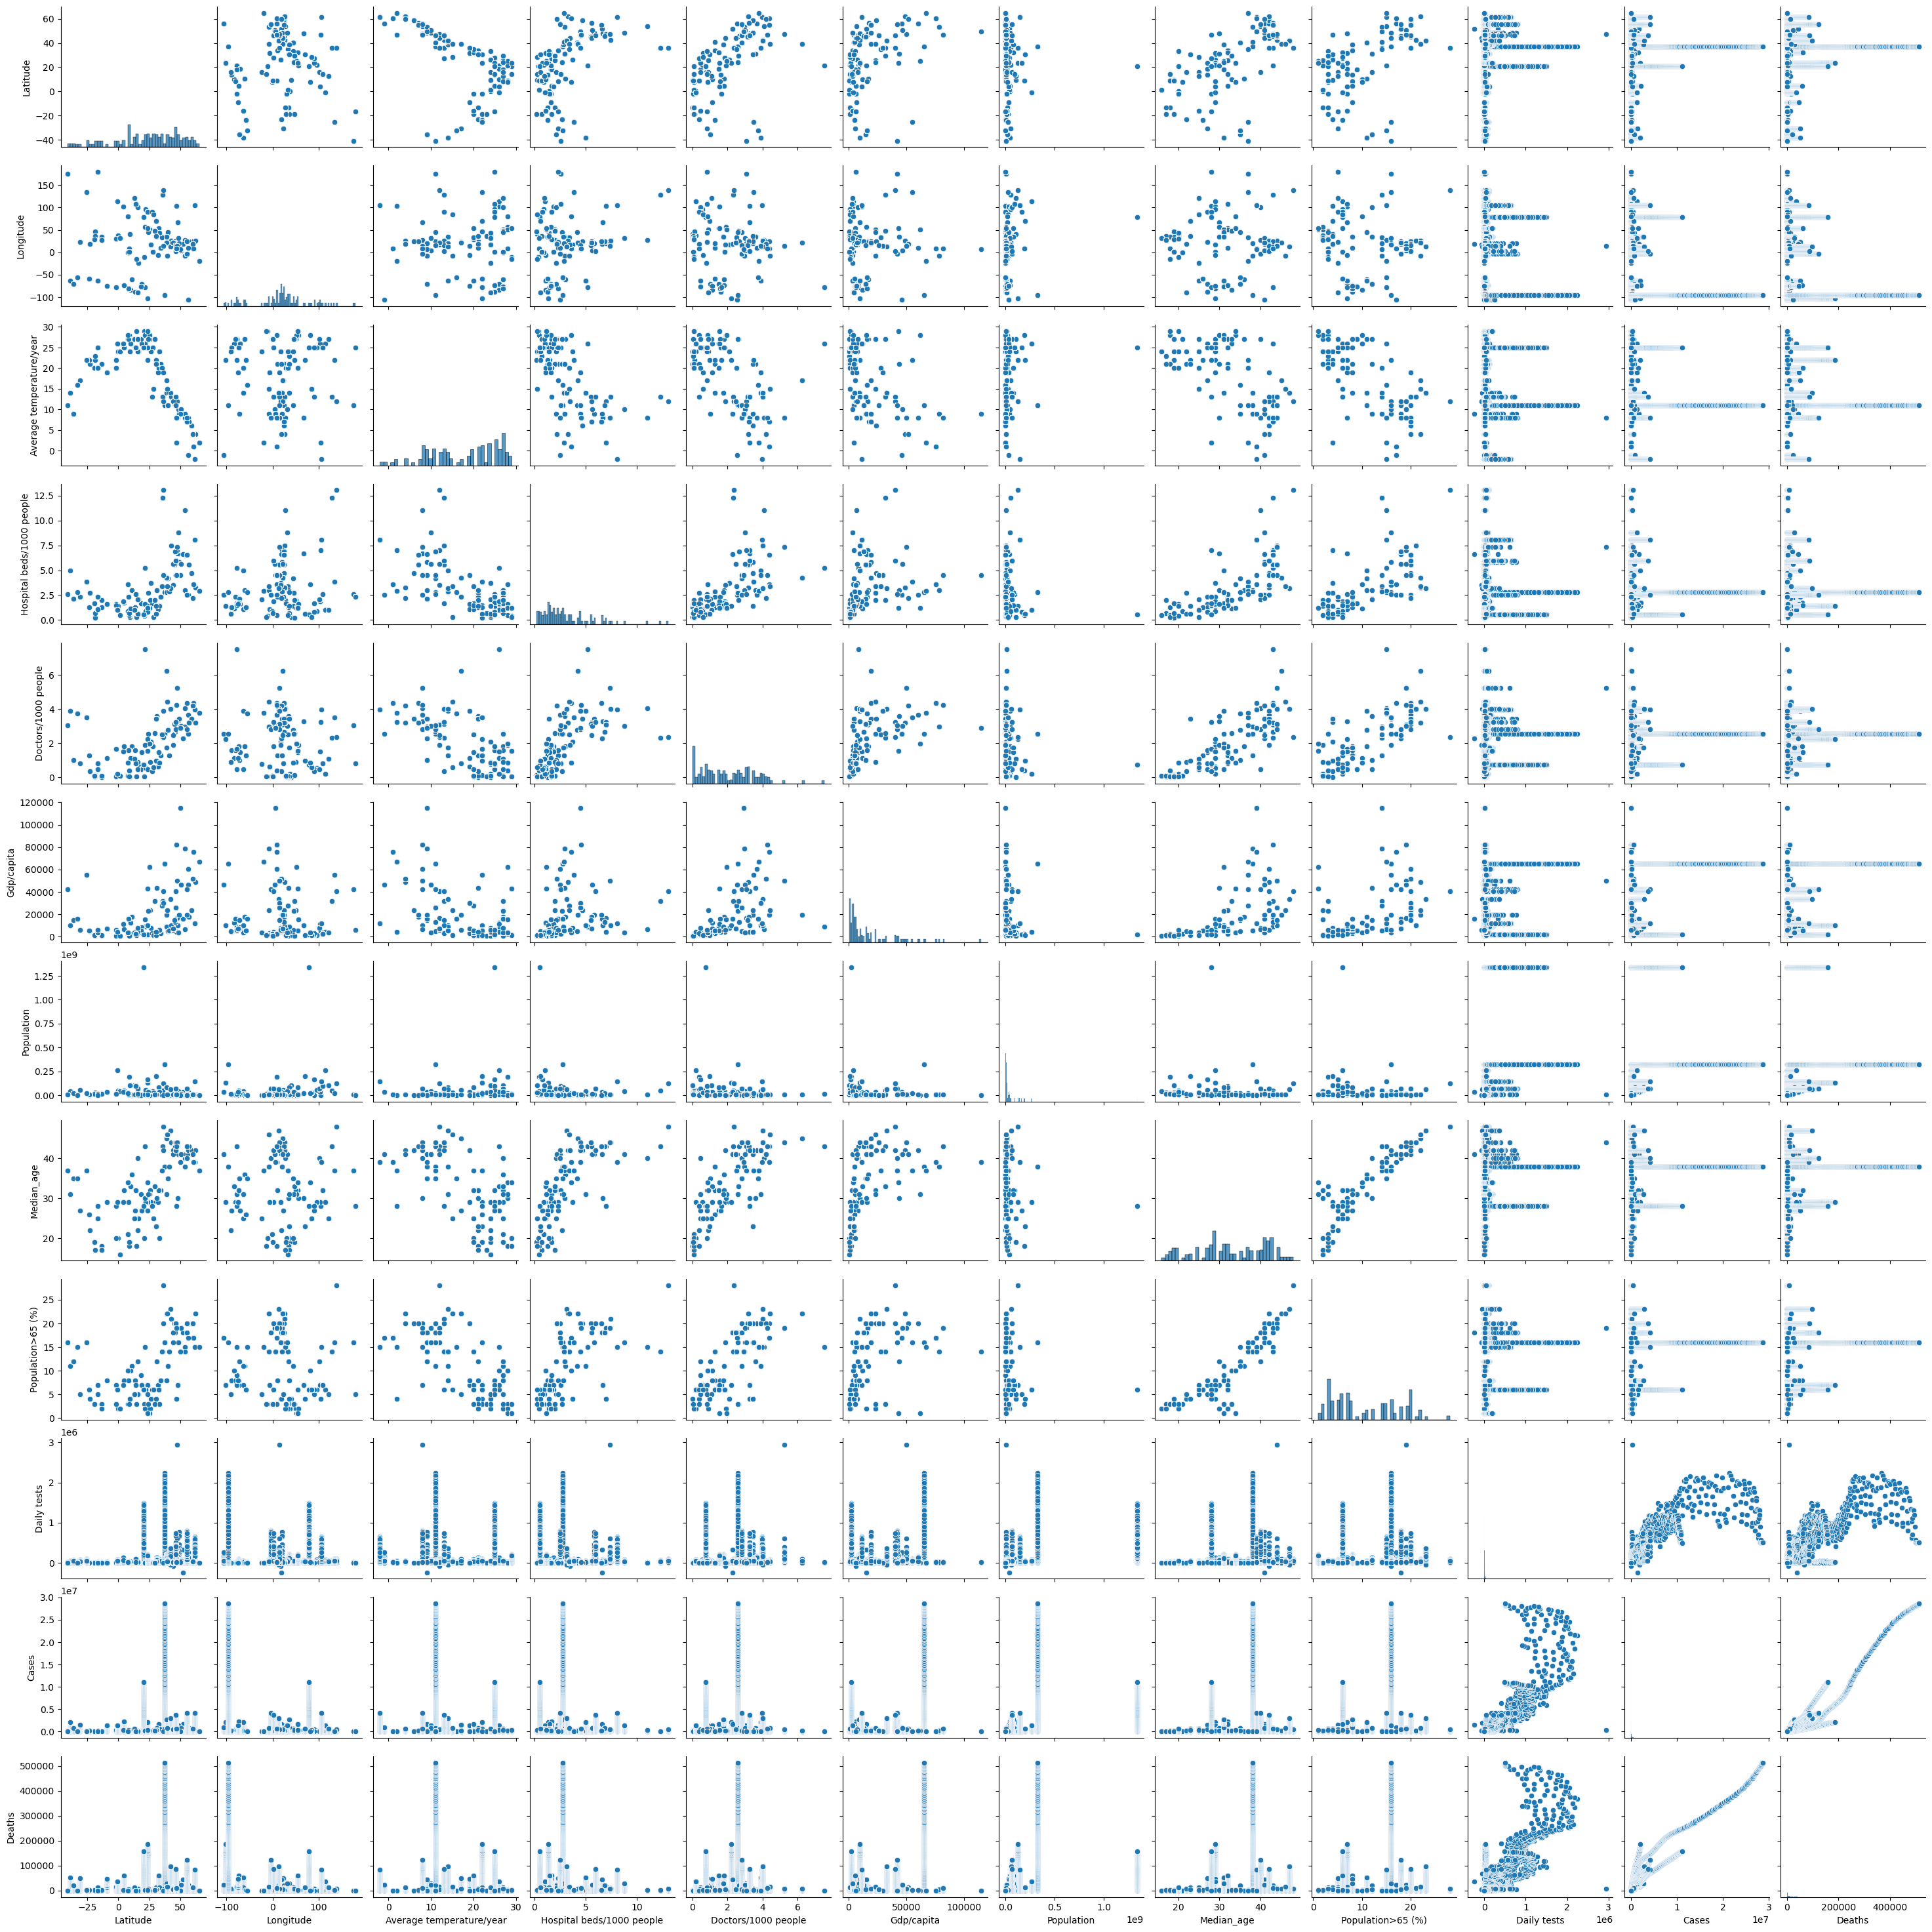

In [29]:
sns.pairplot(df,kind = 'scatter') # warning: about 3 minutes render

### Total Cases in countries from jan 2020 to March 2021 World Map

soley marking with variable size that indicated total cases in a country is hard to distinguish. So more marking customisation is needed.

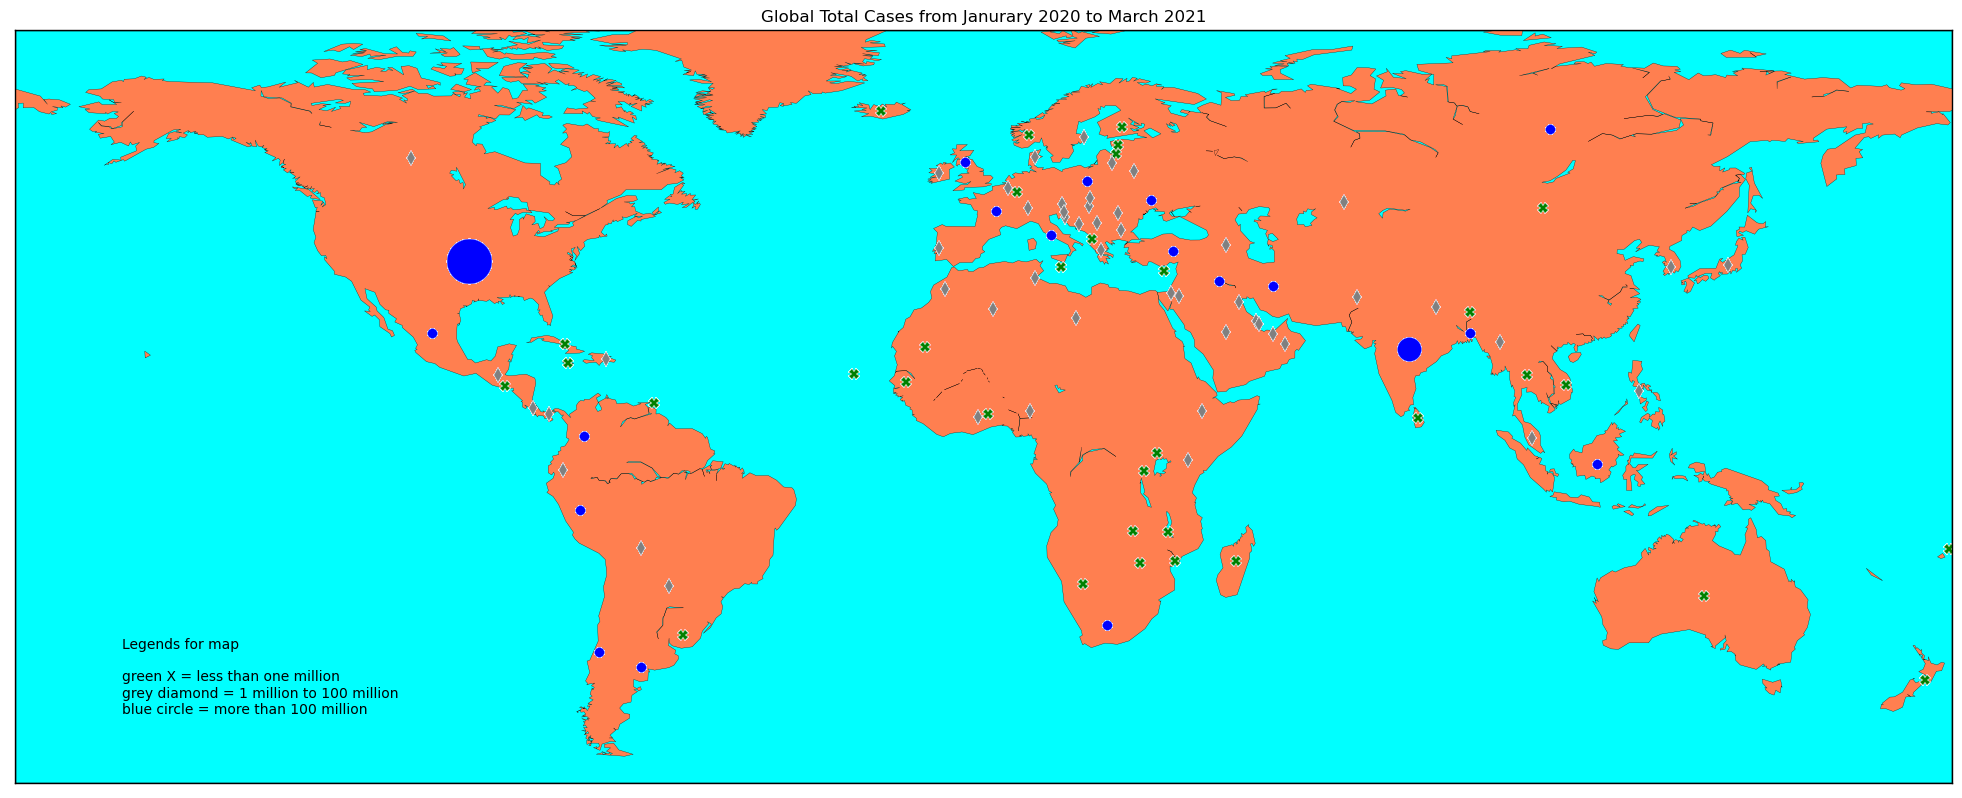

In [125]:
lowerlat =-59
upperlat=84

lowerlong=-170
upperlong=194

grouped_df = df.groupby(['Country']).sum()
plt.figure(figsize=(25,20))
m = Basemap(llcrnrlat=-60,urcrnrlat=80,
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,
            resolution='c',)
m.drawcoastlines(linewidth=0.2)
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
avg = (grouped_df.Cases.sum())/len(grouped_df.Cases)
for index, row in grouped_df.iterrows():
    
    markersize = row.Cases/100000000 # 100 million
    if markersize >1:
        marker ="o"
        facecolor = "blue"
    elif markersize >0.1:
        facecolor="grey"
        marker = 'd'
    else:
        facecolor="green"
        marker="X"

    if markersize < 1:
        markersize =7
    elif markersize <.5:
        markersize =7

    if marker == "o" and markersize<7:
        markersize=7

    m.plot(df.loc[df.Country == index,'Longitude'],
    df.loc[df.Country == index,'Latitude'],
    markersize = markersize,
    markerfacecolor=facecolor,
    markeredgecolor = "white",
    markeredgewidth = 0.2,
    marker=marker)
plt.title("Global Total Cases from Janurary 2020 to March 2021")
plt.text(-160,-50,'''
Legends for map

green X = less than one million  
grey diamond = 1 million to 100 million  
blue circle = more than 100 million
''')
plt.show()

# Cases and Deaths trends
Exporting solely for these line graphs:

In [ ]:
t =cur.execute('''SELECT date,cases,deaths,country,region FROM covid19_country_data''')
df = pd.DataFrame(t.fetchall(),columns= ["Date","Cases","Deaths","Country","Region" ])
df.Date = pd.to_datetime(df.Date,format="%Y-%m-%d")


### By region

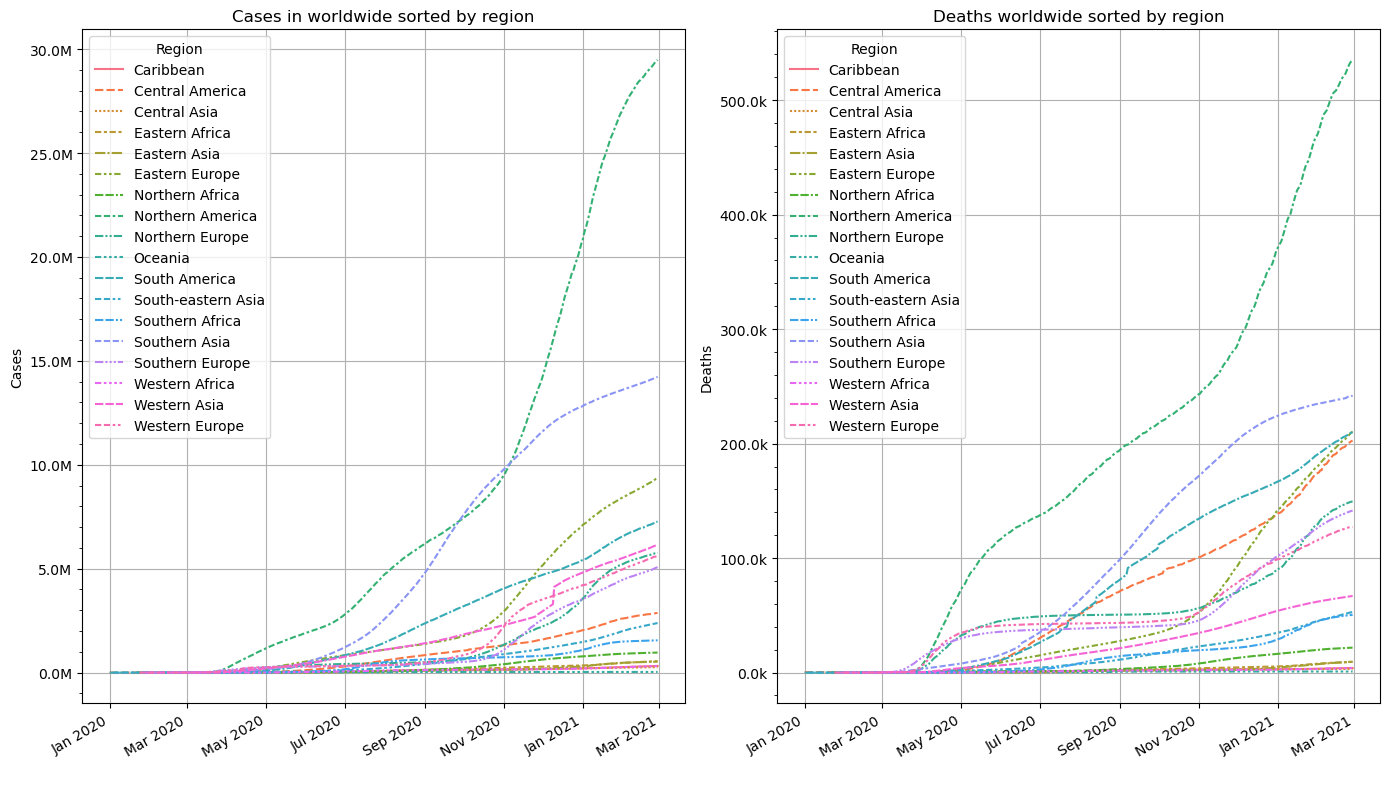

In [ ]:
grouped_df = df.groupby(['Region','Date']).sum()

f, axs = plt.subplots(1, 2, figsize=(14, 8))
f.autofmt_xdate()
axs[0].set_title('Cases in worldwide sorted by region')
axs[0].set_xlabel(" ")
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
def xtickfunc(x,_) :
    return str(x/1000000)+"M"
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(xtickfunc))
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].grid(True)


def ytickfunc(x,_):
    return str(x/1000)+"k"
axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(ytickfunc))
axs[1].set_title('Deaths worldwide sorted by region')
axs[1].set_xlabel(" ")
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[1].grid(True)


sns.lineplot(data=grouped_df,x="Date",y="Cases",style="Region",hue="Region",ax=axs[0])
sns.lineplot(data=grouped_df,x="Date",y="Deaths",style="Region",hue="Region",ax=axs[1])
f.tight_layout()

### By country

A sorted region list was created instead of the unsorted `df.Region.unique()`.

In [126]:
# Commented out heatmap as it may be unnecessary.


# regions = [
#     'Northern Europe','Southern Europe', 'Western Europe', 'Eastern Europe', 
#     'Northern America','South America','Central America','Caribbean', 
#     'Northern Africa','Southern Africa','Eastern Africa',  'Western Africa',
#     'Oceania',
#     'Southern Asia', 'South-eastern Asia', 'Eastern Asia', 'Western Asia',
#     'Central Asia'] #sorted
# for region in regions:
#     f, axs = plt.subplots(1, 2, figsize=(10, 6))
#     f.autofmt_xdate()
    
#     axs[0].set_title('Cases in '+region)
#     axs[0].set_xlabel(" ")
#     axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
#     def xtickfunc(x,_) :
#        return str(x/1000000)+"M"
#     axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(xtickfunc))
#     axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())
#     axs[0].grid(True)


#     def ytickfunc(x,_):
#         return str(x/1000)+"k"
#     axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(ytickfunc))
#     axs[1].set_title('Deaths in '+region)
#     axs[1].set_xlabel(" ")
#     axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
#     axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())
#     axs[1].grid(True)


#     sns.lineplot(data=df[df.Region==region],x="Date",y="Cases",hue="Country",style="Country",ax=axs[0])
#     sns.lineplot(data=df[df.Region==region],x="Date",y="Deaths",hue="Country",style="Country",ax=axs[1])
#     f.tight_layout()
    


# Close Connection

In [37]:
cur.close()
con.close()